In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [508]:
df_train = pd.read_csv('deeptweets\train.csv')
df_train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [509]:
df_test = pd.read_csv('deeptweets\test.csv')
df_test.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


# Preprocessing the data

In [510]:
df_train.isnull().values.any()

False

<Axes: xlabel='Label', ylabel='count'>

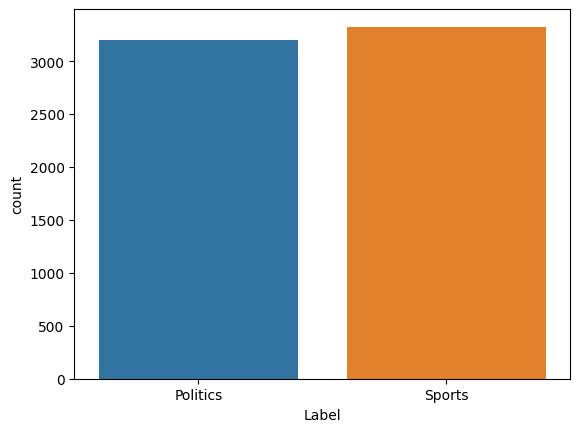

In [511]:
sns.countplot(x='Label',data=df_train)

In [512]:
# Label encoding 0 = Sports , 1 = Politics
def LabelEncoding(df):
    y = df['Label']
    y = np.array(list(map(lambda x: 1 if x=='Politics' else 0,y)))
    df['Label_encoding'] = y
    return df

In [513]:
df_train = LabelEncoding(df_train)
df_train.head()

,TweetId,Label,TweetText,Label_encoding
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,1
1,304834304222064640,Politics,'@rraina1481 I fear so',1
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,0
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,0
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,0


In [514]:
# function to Remove text based on patterns 
def remove_pattern(txt, pattern):
    r = re.findall(pattern,txt)
    for word in r:
        txt = re.sub(word,"",txt)
    return txt

In [515]:
def clean_tweet(df):
    
    # remove twitter handles @ 
    df['clean_tweet'] = np.vectorize(remove_pattern)(df['TweetText'],"@[\w]*")
    
    # remove special characters, numbers and punctuations
    df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
    
    # remove short words (if word lenght smaller than 3)
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
    
    # remove urls
    df['clean_tweet'] = df['clean_tweet'].str.replace('https?://\S+|www\.\S+'," ")
    
    # Remove the ' 
    df['clean_tweet'] = df['clean_tweet'].str.replace("'", "")
    
        
    return df


In [516]:
df_train = clean_tweet(df_train)
df_train.head()

,TweetId,Label,TweetText,Label_encoding,clean_tweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,1,"#SecKerry: value measured, dollars, terms deep..."
1,304834304222064640,Politics,'@rraina1481 I fear so',1,fear
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,0,Watch video highlights #wwc13 final between Au...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,0,Nitro Circus #AlbertPark #theymakeitlooksoeasy...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,0,Always good thing. Thanks feedback :-)


In [517]:
df_test = clean_tweet(df_test)
df_test.head()

,TweetId,TweetText,clean_tweet
0,306486520121012224,'28. The home side threaten again through Maso...,28. home side threaten again through Mason Ben...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....,asking. http://t.co/yGJePjkf. derives from ser...
2,289531046037438464,'@Sochi2014 construction along the shores of t...,construction along shores Black http://t.co/8d...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...,#SecKerry\u2019s remarks after meeting with Fo...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...,The #IPLauction begun. Ricky Ponting first pla...


In [518]:
from nltk.stem.porter import PorterStemmer
def tokenize(df):
    
    # individual words considered as tockens
    tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
    
    # Stem the words (use one same word for multiple words that mean and are origin of the same word)
    stemmer = PorterStemmer()
    tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
    
    # Combine into single sentence
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    df['clean_tweet'] = tokenized_tweet
    return df

In [519]:
df_train = tokenize(df_train)
df_train.head()

,TweetId,Label,TweetText,Label_encoding,clean_tweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,1,"#seckerry: valu measured, dollars, term deepes..."
1,304834304222064640,Politics,'@rraina1481 I fear so',1,fear
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,0,watch video highlight #wwc13 final between aus...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,0,nitro circu #albertpark #theymakeitlooksoeasi ...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,0,alway good thing. thank feedback :-)


In [520]:
df_test = tokenize(df_test)
df_test.head()

,TweetId,TweetText,clean_tweet
0,306486520121012224,'28. The home side threaten again through Maso...,28. home side threaten again through mason ben...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....,asking. http://t.co/ygjepjkf. deriv from seri ...
2,289531046037438464,'@Sochi2014 construction along the shores of t...,construct along shore black http://t.co/8dvin7wj
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...,#seckerry\u2019 remark after meet with foreign...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...,the #iplauct begun. ricki pont first player un...


# Feature Extraction

In [521]:
    # from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_df=0.9, min_df=2,max_features=1000,stop_words='english')
# X = vectorizer.fit_transform(df_train['clean_tweet'])

In [522]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# Create the feature matrix and target vector
vectorizer = TfidfVectorizer()
vectorizer.fit(df_train['TweetText'])
X = vectorizer.transform(df_train['TweetText']).toarray()

# Split train,test 

In [523]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,df_train['Label_encoding'],random_state=42, test_size = 0.25)

# Model Training

In [524]:
from sklearn.linear_model import LogisticRegression

In [525]:
# # Training
# model = LogisticRegression()
# model.fit(X_train, y_train)

In [526]:
# Train the model
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
model = MultinomialNB(alpha=2)
model.fit(X_train, y_train)

MultinomialNB(alpha=2)

In [527]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       836
           1       0.97      0.94      0.95       796

    accuracy                           0.96      1632
   macro avg       0.96      0.95      0.96      1632
weighted avg       0.96      0.96      0.96      1632

score train: 0.98 test: 0.96


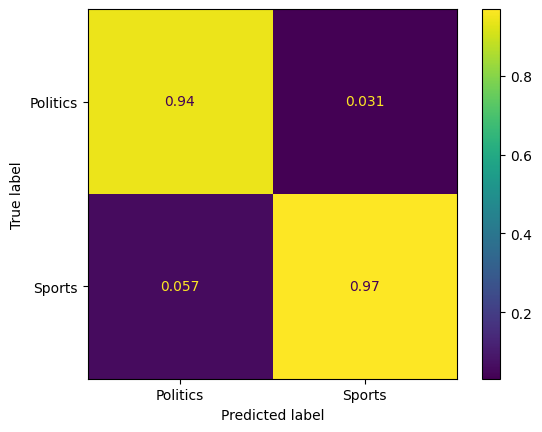

In [528]:
# testing Scores

y_predict = model.predict(X_test)

print("{}\nscore train: {:.2} test: {:.2}".format(
    classification_report(y_test, y_predict),
    model.score(X_train, y_train), model.score(X_test, y_test)
))

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_predict, normalize='pred'),
    display_labels=["Politics", "Sports"], 
).plot()

# Submission

In [529]:
# # Vectorize df_test
# X_df_test = vectorizer.fit_transform(df_test['clean_tweet'])

In [530]:
X_df_test = vectorizer.transform(df_test['TweetText']).toarray()

In [531]:
df_test_pred = model.predict(X_df_test)

In [532]:
# create submission file
prediction_labels = ["Sports" if p <= 0.5 else "Politics" for p in df_test_pred]
submission_df = pd.DataFrame({'TweetId': df_test['TweetId'], 'Label': prediction_labels})

submission_df.to_csv('predictions.csv', index=False)

In [533]:
submission_df

,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Sports
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Sports
...,...,...
2605,282023761044189184,Politics
2606,303879735006601216,Sports
2607,297956846046703616,Sports
2608,304265049537658880,Politics
